In [18]:
import csv, matplotlib, pandas as pd

In [19]:
def clean(titles):
    cleaned = []
    ignoreList =[]
    punctList = [".", ",", "?", "!", ";", ":", "\"", "'", "…", "–", "--", "—", "[", "]", "{", "}"]
    importList("stopwords.txt", ignoreList)
    str = ""
    # a bit would be considered each paragraph/document, a token would be
    # considered a word in that paragraph
    for t in titles:
        str = ""
        t = t.lower()
        for token in t.split():
            for i in range(0, len(token)):
                # checks if any of the characters in the word are punctuation,
                # removes it if so 
                if(token[i] in punctList):
                    token = token.replace(token[i], ' ')
                if(token[i].isdigit()):
                    token = token.replace(token[i], ' ')      
            token = token.replace(" ", "")
            
            if "’" in token:
                if token.split("’")[0].lower() not in ignoreList:
                    str += token.split("’")[0] + " "
                if token.split("’")[1].lower() not in ignoreList:
                    str += token.split("’")[1] + " "
            elif token.lower() not in ignoreList:
                str += token + " "
        cleaned.append(str)
    return cleaned

# 'importList': creates a list of terms from a file
def importList(file, aList):
  with open(file) as f:
    for lines in f:
      aList.append(lines.strip("\n"))
    f.close()

In [20]:
titles = []
ids = []
with open('excerpt.tsv', newline='') as csvfile:
  tsvr = csv.reader(csvfile, delimiter='\t')
  for line in tsvr:
    try:
      title = line[1]
      titles.append(title)
      id = line[0]
      ids.append(id)
    except:
      pass

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(titles)

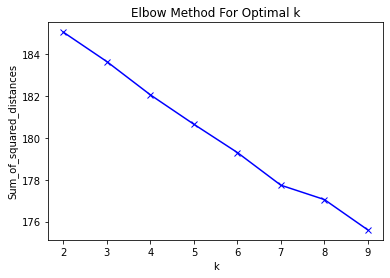

In [22]:
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
print("model fit")
labels=model.labels_
title_cl=pd.DataFrame(list(zip(ids,labels)),columns=['title','cluster'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(title_cl.sort_values(by=['cluster']))

model fit
          title  cluster
60   1008155382        0
49   1006138312        0
21     10015129        0
17   1001198982        0
75   1011350365        0
32   1002896436        0
156  1014163384        0
36   1003935529        0
79   1011793632        0
4    1000706485        0
58   1008117465        1
166  1015432663        1
65   1008353508        1
51   1006250858        1
64   1008328731        1
160  1015422862        1
161  1015423258        1
52   1006483184        1
53   1006650692        1
61   1008155706        1
103  1011983091        1
165  1015430881        1
162  1015425535        1
55   1006898049        1
164  1015430430        1
159  1014207934        1
70   1008471615        1
157  1014198188        1
89   1011873822        1
88   1011872887        1
93   1011885081        1
135  1013302788        1
95   1011904089        1
96   1011905970        1
97   1011921837        1
146  1013388027        1
134  1013298982        1
132  1013276652        1
78   1011771753